Path to dataset files: /root/.cache/kagglehub/datasets/suruchiarora/yahoo-finance-dataset-2018-2023/versions/1
           Date      Open      High       Low    Close*  Adj Close**  \
0  Apr 28, 2023  33797.43  34104.56  33728.40  34098.16     34098.16   
1  Apr 27, 2023  33381.66  33859.75  33374.65  33826.16     33826.16   
2  Apr 26, 2023  33596.34  33645.83  33235.85  33301.87     33301.87   
3  Apr 25, 2023  33828.34  33875.49  33525.39  33530.83     33530.83   
4  Apr 24, 2023  33805.04  33891.15  33726.09  33875.40     33875.40   

      Volume  
0  354310000  
1  343240000  
2  321170000  
3  297880000  
4  252020000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1258 non-null   object 
 1   Open         1258 non-null   float64
 2   High         1258 non-null   float64
 3   Low          1258 non-null   float64
 4   Clo

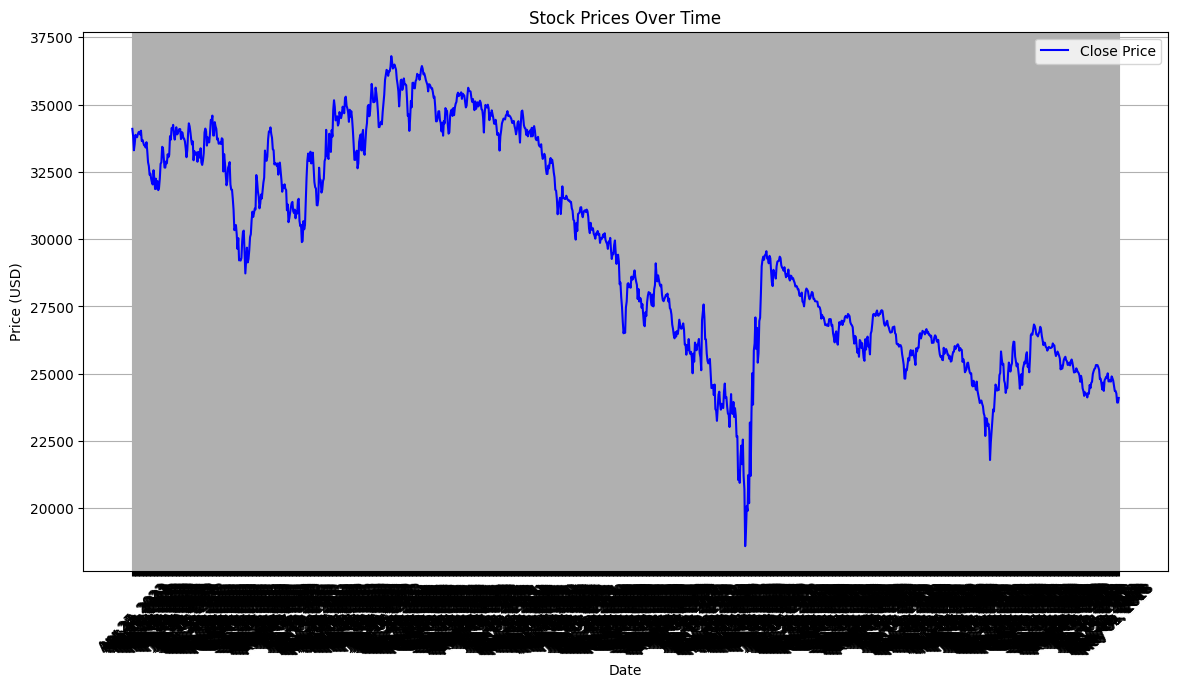

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in a

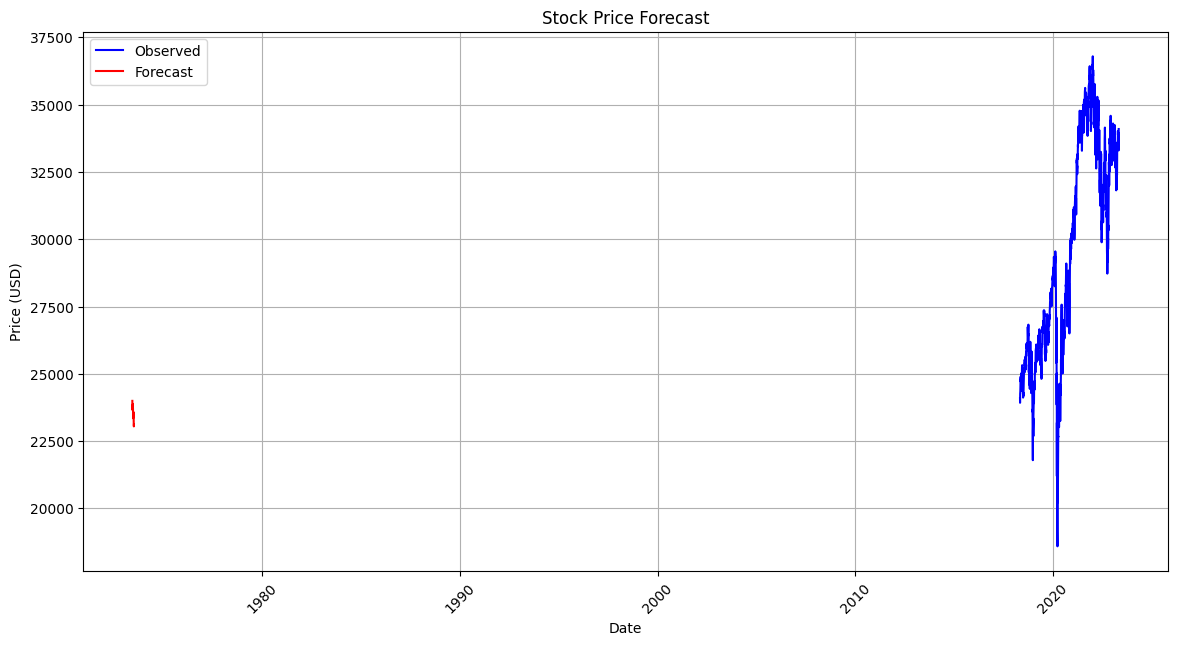

In [ ]:
  # Import necessary libraries
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import plotly.graph_objects as go

# Step 1: Download the dataset
path = kagglehub.dataset_download("suruchiarora/yahoo-finance-dataset-2018-2023")
print("Path to dataset files:", path)

# Step 2: Set the path to the dataset
dataset_path = '/root/.cache/kagglehub/datasets/suruchiarora/yahoo-finance-dataset-2018-2023/versions/1'

# Step 3: Load the dataset from the Excel file
df = pd.read_excel(os.path.join(dataset_path, 'yahoo_data.xlsx'))

# Step 4: Preview the dataset
print(df.head())
print(df.info())

# Step 5: Rename columns for easier access
df.rename(columns={'Close*': 'Close'}, inplace=True)

# Step 6: Exploratory Data Analysis (EDA)
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Step 7: Visualization - Line plot of stock prices
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# Step 8: Candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                      open=df['Open'],
                                      high=df['High'],
                                      low=df['Low'],
                                      close=df['Close'])])
fig.update_layout(title='Candlestick Chart', xaxis_title='Date', yaxis_title='Price (USD)')
fig.show()

# Step 9: Time Series Analysis - Exponential Smoothing
df['Date'] = pd.to_datetime(df['Date'])  # Convert date to datetime format
df.set_index('Date', inplace=True)  # Set date as index
model = ExponentialSmoothing(df['Close'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Step 10: Forecast for the next month
forecast = model_fit.forecast(30)  # Forecast for the next 30 days

# Step 11: Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Observed', color='blue')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()
